In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import Lasso
from sklearn.decomposition import pca
import seaborn as sns
from numpy.linalg import inv,pinv
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,MultiTaskLassoCV,MultiTaskLasso
from sklearn.preprocessing import StandardScaler
import scipy.io as sio
import PyQt4
from oct2py import Oct2Py,octave
sns.set_context()
octave.addpath("/home/skanda/Documents/Ericsson")
os.chdir('../preprocessed_data/')

In [2]:
df = pd.read_csv('Final_Dataset.csv')
df.index = pd.to_datetime(df['timestamp'])
df = df.drop(['timestamp'], axis =1)
df

,srst2,lcll1,gtot2,mgpt2,hist2,babt2,irdt2,sdrt2,sgnt2,awrt2,...,42019,rtat2,pmnt2,vcat2,pcnt2,eptt2,pact2,ptit2,luit2,fcgt2
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-07 19:00:00,2.3,1.950000,0.870000,2.41,2.410000,2.27,2.130000,3.20,3.450000,2.48,...,5.3,2.16,2.02,18.81,1.150000,1.900000,3.02,2.020000,1.72,2.71
2017-01-07 20:00:00,3.4,3.200000,2.370000,3.82,3.830000,3.26,3.310000,4.52,4.510000,3.89,...,5.7,3.55,2.52,19.26,2.590000,3.430000,4.31,2.477778,2.99,4.02
2017-01-07 21:00:00,4.4,3.930000,3.730000,4.71,4.810000,4.21,4.350000,5.28,4.920000,5.05,...,6.6,4.63,3.15,19.47,3.700000,4.430000,5.20,2.930000,4.00,4.69
2017-01-07 22:00:00,4.8,4.050000,4.540000,5.10,5.070000,4.96,5.350000,5.68,5.030000,5.66,...,7.8,5.53,3.93,19.47,4.420000,4.980000,5.78,3.530000,4.79,4.92
2017-01-07 23:00:00,4.2,3.440000,4.740000,4.68,3.770000,5.31,5.830000,4.89,3.230000,5.67,...,8.2,5.66,4.45,20.26,4.690000,4.740000,5.73,4.022222,5.17,4.06
2017-01-08 00:00:00,2.3,2.350000,4.760000,4.05,1.820000,5.35,5.270000,2.72,0.900000,5.28,...,8.8,5.21,4.65,20.77,4.530000,4.380000,5.59,4.520000,5.23,3.22
2017-01-08 01:00:00,1.6,1.310000,4.700000,3.69,0.820000,5.13,6.090000,1.46,1.270000,4.97,...,9.1,4.87,4.63,20.43,4.440000,4.090000,5.52,5.100000,5.01,2.60
2017-01-08 02:00:00,1.2,0.780000,4.440000,3.26,0.130000,4.52,5.760000,0.27,-0.250000,4.69,...,9.3,4.50,4.73,19.97,4.290000,4.130000,5.28,5.400000,4.74,2.12
2017-01-08 03:00:00,0.8,0.400000,4.250000,2.74,-0.190000,4.23,4.840000,-0.09,-1.870000,4.33,...,9.4,4.38,4.30,19.70,4.350000,4.330000,5.11,5.760000,4.51,0.93


In [3]:
data = df.values
matrix = sio.loadmat('Matrix.mat')
#data = matrix['Y']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scX = MinMaxScaler()
fogs = scX.fit_transform(data)
U,Sigma,VT = np.linalg.svd(fogs)
s_sum = Sigma.cumsum()
Sigma,s_sum
N_COMP = np.where(s_sum <= 0.9*s_sum[Sigma.shape[0]-1])
y = np.where(s_sum > 0.9*s_sum[Sigma.shape[0]-1])
y = y[0][1:]
N = VT[:,y]
N = N.T
for s in s_sum:
    print s,'\t',s/s_sum[Sigma.shape[0]-1]

292.4327794212184 	0.806370012110716
303.6629374872827 	0.8373366592617654
313.2449228607184 	0.8637585456074568
319.68242294636076 	0.8815096576144492
324.4977662052554 	0.8947877463761715
329.1280966036572 	0.9075556706383754
333.1401352494613 	0.9186186836761367
336.92889176107394 	0.929066006442758
340.3887181314954 	0.9386063193917356
343.0047217245764 	0.9458198296323093
345.3439034820681 	0.9522700163242764
347.5007337622877 	0.9582173771592133
349.46435346892304 	0.9636319686757807
351.33758338564957 	0.9687973144814955
352.9360047452286 	0.9732048882618112
354.4712810744888 	0.97743834250955
355.94345136829816 	0.9814977847512769
357.316817626048 	0.9852847793832947
358.65862866734756 	0.9889847619494232
359.8543552501545 	0.9922819233037949
360.9820684650387 	0.9953915409073459
361.89117059490366 	0.9978983484441754
362.6533415544065 	1.0


In [7]:
COMP = 10 - N_COMP[0].shape[0] - 1
COMP
print U.shape,Sigma.shape,VT.shape

(7270, 7270) (23,) (23, 23)


In [135]:
N.shape
Y = fogs.T
np.set_printoptions(threshold=np.nan)
A = np.eye(Y.shape[0],Y.shape[0])
print A.shape,Y.shape
T = np.zeros((Y.shape[0],Y.shape[0]),dtype = float)
T.shape

(23, 23) (23, 7270)


(23, 23)

In [136]:
n1 = np.linalg.norm(Y - X)
n2 = np.linalg.norm(Y)
n1/n2

0.8559998483014489

In [137]:
scaler = StandardScaler()
Y = scaler.fit_transform(data.T)
COMP =11
#reg = Lasso(alpha= 0.003,positive=True)
#reg = OrthogonalMatchingPursuit(n_nonzero_coefs=COMP)
#reg.fit(A,Y)
X = octave.OMP(A, Y, COMP)
X = X.toarray()
#X = scaler.fit_transform(X)
#n1 = np.linalg.norm(Y- X.T)
#n2 = np.linalg.norm(Y)
#print n1/n2
print X

[[ 0.          0.          0.          0.         -0.37419001 -0.68503877
  -0.75343223 -0.73550618 -0.71241819 -0.52764601 -0.7099242  -0.53785065
  -0.51288269 -0.7171794  -0.79623286 -0.76145404 -0.80065117 -0.86560782
  -0.78209319 -0.99695912 -0.99991168 -0.9614371  -0.90009304 -0.95585067
  -1.0383736  -1.10732468 -1.15484183 -1.10755095 -1.25604502 -1.24784866
  -0.75172985 -1.65372324 -1.59929033 -1.52362504 -1.6423636  -1.5375725
  -1.45014375 -1.17595    -0.81244493 -1.40884417 -1.4373824  -1.01842846
   0.         -0.60204129 -0.88409163 -1.0234417  -0.96150978 -1.13775355
  -1.170814   -1.08946816 -1.16381232 -1.17660877 -1.16900975 -1.02535796
  -1.07781814 -1.06132675 -1.00441368 -0.72702452 -0.69213765 -0.66565804
  -0.56310065 -0.69645367 -0.6529256  -0.66422201 -0.65408715 -0.64825262
  -0.74129293 -0.60908445 -0.71852945 -1.05586679 -1.07388681 -1.04425594
  -0.96193764 -1.01540045 -1.01707756 -1.24103798 -1.45604071 -1.47829877
  -1.5333162  -1.351977   -1.08716218 -

In [138]:
Z = np.count_nonzero(X, axis = 1)
#Z = np.reshape(a=Z, newshape=(Z.shape[0],))
Z

array([4261, 5439, 1866, 2731, 4327, 2286, 2845, 3783, 2875, 2005, 4194,
       4640, 4512, 4877, 2309, 4651, 5496, 1793, 2468, 3079, 5214, 2315,
       2004])

In [139]:
vals = np.argsort(Z)
nZinds = vals[23-COMP:]
Zinds = vals[:23-COMP]
Z[nZinds] = 1
Z[Zinds] = 0
X[nZinds] = 1
X[Zinds] = 0
Z

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0])

In [140]:
A,_,__ = recompute(A,iden = False)

(23, 23)
132
[ 0  1  4  7 10 11 12 13 15 16 20]


In [141]:
_,A

(array([[-0.80151457, -0.22508878,  0.20695822,  0.41538599,  0.69190514,
         -0.55784997, -0.03719968, -0.46793578, -0.02994862, -0.57226393,
         -0.21378937],
        [ 0.577017  ,  0.26865128,  0.15842734, -0.67671916,  0.02682345,
          0.22329709, -0.09152015,  0.14648246, -0.22178259, -0.24107868,
          0.13818558],
        [-0.0537346 ,  0.00792169,  0.03508898, -0.12372452,  0.14694035,
          0.18813287, -0.08852943, -0.05386787,  0.06948745, -0.13328323,
          0.05135542],
        [ 0.22678399,  0.07403358,  0.1341365 , -0.20627792,  0.18381031,
         -0.15076661, -0.03027248,  0.27590743,  0.074897  ,  0.47869245,
         -0.14068619],
        [ 0.41451928,  0.0832315 , -0.13732459, -0.11366811, -0.48315674,
          0.05569889,  0.35548615,  0.17937075, -0.04523075,  0.6295193 ,
          0.06837684],
        [ 0.48282254,  0.18334681, -0.16249608,  0.07153022, -0.10856937,
          0.13710653,  0.01825366, -0.60855096,  0.06383773, -0.9064436

In [142]:
print X[:,0],105*'-'
print A

[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.] ---------------------------------------------------------------------------------------------------------
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [-0.80151457 -0.22508878  0.          0.          0.20695822  0.
   0.          0.41538599  0.          0.          0.69190514 -0.55784997
  -0.03719968 -0.46793578  0.         -0.02994862 -0.57226393  0.
   0.          0.         -0.21378937  0.          0.        ]
 [ 0.577017    0.26865128  0.   

In [143]:
#scA = MinMaxScaler()
#A = scA.fit_transform(A)
yhat = np.matmul(A,X)
yhat[nZinds] = Y[nZinds]
#yhat[yhat<0] = 0
#print (yhat<0).sum()
n1 = np.linalg.norm(Y- yhat)
n2 = np.linalg.norm(Y)
_pred,_truth = yhat[:,0] , Y[:,0]
n1/n2

0.9929910522564105

In [125]:
np.where(yhat == 1)[0]
Y[Zinds,0], yhat[Zinds,0]
#np.correlate(Y[:,0],yhat[:,0],'full')

(array([-0.53450675, -0.61497013, -0.08621077, -0.37070629, -0.15230569,
        -0.31897983, -0.24426384, -0.21265322]),
 array([ 0.18621974, -0.50866846,  0.01404596, -0.19733852, -0.32009683,
         0.50424804, -0.30137847,  0.13947585]))

In [67]:
def recompute(A,iden = False):
    mat = np.zeros((A.shape[0], A.shape[1]), dtype=float)
    if iden == True:
        mat = A
    print mat.shape
    N1,N2 = gen(N, X)
    #print N1.shape,N2.shape
    B = np.matmul(pinv(N1), N2)
    B = np.dot(-1, B)
    C = B.flatten('F')
    print C.shape[0]
    nz_inds = Z.nonzero()[0]
    print nz_inds
    for j in nz_inds:
        for i in range(Z.shape[0]):
            #print i,j,mat[i,j]
            if Z[i] == 0:
                #print mat[i,j]
                mat[i,j] = C[0]
                #print C[0]
                #print i,j
                C = C[1:]
            else:
                mat[i,i] = 1
                #print i,j
    return mat,B,C

In [68]:
def gen(N, X):
    z_ind = np.where(Z == 0)
    nz_ind = Z.nonzero()
    #print z_ind, nz_ind
    N1 = N[:,z_ind[0]]
    N2 = N[:,nz_ind[0]]
    return N1,N2

In [72]:
scY = MinMaxScaler()
iden = False
i = 0
norms = np.ndarray(0)
hand =  open('output.txt', 'w')
for k in range(2,18):
    i = i+1
    if i>1:
        iden = True
    #print iden
    A,B,C = recompute(A[:,nZinds],iden)
    #print A
    #sns.heatmap(A)
    #plt.show()
    #A = scA.fit_transform(A)
    #Y,nz_inds = MatrixMul(A,X)
    X_Mul = X.T[nZinds,:]
    Yhat = np.matmul(A,X_Mul)
    Yhat = scY.fit_transform(Yhat)
    norm1 = np.linalg.norm(Y - Yhat)
    norm2 = np.linalg.norm(Y)
    norm  = norm1/norm2
    norms = np.append(norms, norm)
    #iden = False
    #print A
    print ' parse ' + str(i)
    print Z
    print 75*'-'
    print ' NORM : ' + str(norm)
    """print 75*'-'
    print ' Yhat :\n '
    print Yhat
    print 75*'-'
    print ' X :\n '
    print X"""
    print '\n\n'
    BIG_STR = 'parse ' + str(i) + '\n' + str(75*'-') + '\nNORM : ' + str(norm) + '\n' + str(75*'-') + '\nYhat :\n'+  str(Yhat) + '\n' + str(75*'-') + '\nX :\n' + str(X) + '\n\n'
    hand.write(BIG_STR)
    if norm < 0.00001:
        break
    reg = OrthogonalMatchingPursuit(n_nonzero_coefs=23-k)
    #reg = Lasso(alpha=0.003, positive=True)
    reg.fit(A, Y)
    X_prev = X
    X = reg.coef_
    if X.all() == X_prev.all():
        print ''
    Z = np.count_nonzero(X, axis = 0)
    vals = np.argsort(Z)
    nZinds = vals[1:]
    Zinds = vals[0]
    Z[nZinds] = 1
    Z[Zinds] = 0
    X.T[nZinds] = 1
    X.T[Zinds] = 0
    vals = vals[1:]
    #A = A[:,nZinds]
    #X = X[:,nZinds]
hand.close()

(23, 22)
22
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


IndexError: index 22 is out of bounds for axis 1 with size 22

In [437]:
A.shape,X.shape,Y.shape,Z.shape,X_Mul.shape,norms.shape
#reg = OrthogonalMatchingPursuit(n_nonzero_coefs=23-k)
#reg.fit(A,Y)
#Z


((23, 7), (7270, 7), (23, 7270), (7,), (7, 7270), (11,))

In [560]:
plt.scatter(np.arange(17,6,-1), norms)
plt.plot(np.arange(17,6,-1), norms)
plt.xlabel("COMPONENTS")
plt.ylabel("NORM")
plt.show()

In [224]:
Y[:,0],Yhat[:,0]

(array([0.62519203, 0.47320897, 0.54302417, 0.52564565, 0.47411843,
        0.73802525, 0.33297711, 0.24748438, 0.52272444, 0.36295748]),
 array([1.        , 0.51964816, 0.37722589, 1.        , 0.55587125,
        1.        , 0.        , 0.39407171, 1.        , 1.        ]))

In [120]:
df.corr()

,srst2,lcll1,gtot2,mgpt2,hist2,babt2,irdt2,sdrt2,sgnt2,awrt2,...,42019,rtat2,pmnt2,vcat2,pcnt2,eptt2,pact2,ptit2,luit2,fcgt2
srst2,1.000000,0.936840,0.974954,0.969611,0.979812,0.931753,0.931720,0.944982,0.967671,0.945998,...,0.922503,0.937122,0.905697,0.671887,0.949392,0.972303,0.932473,0.901919,0.911259,0.971646
lcll1,0.936840,1.000000,0.921011,0.947424,0.950250,0.885525,0.888128,0.915840,0.899413,0.894588,...,0.854965,0.884740,0.884023,0.606101,0.887043,0.919172,0.881151,0.871370,0.848017,0.903441
gtot2,0.974954,0.921011,1.000000,0.974113,0.968765,0.948458,0.950385,0.945382,0.968946,0.958426,...,0.952471,0.961016,0.913895,0.679632,0.973056,0.986554,0.956756,0.917090,0.922696,0.983069
mgpt2,0.969611,0.947424,0.974113,1.000000,0.970863,0.936843,0.936743,0.952260,0.953426,0.946888,...,0.908630,0.941009,0.913972,0.667897,0.952849,0.978222,0.937647,0.907948,0.905729,0.962246
hist2,0.979812,0.950250,0.968765,0.970863,1.000000,0.923677,0.924811,0.948885,0.960393,0.939828,...,0.901752,0.929081,0.908197,0.647059,0.934497,0.963155,0.922964,0.899977,0.891097,0.960726
babt2,0.931753,0.885525,0.948458,0.936843,0.923677,1.000000,0.993987,0.955516,0.946745,0.974873,...,0.921672,0.985351,0.967012,0.650848,0.969319,0.945098,0.989238,0.963364,0.863231,0.954245
irdt2,0.931720,0.888128,0.950385,0.936743,0.924811,0.993987,1.000000,0.954100,0.943978,0.975505,...,0.925790,0.987473,0.962823,0.650822,0.972039,0.946690,0.992616,0.962650,0.866816,0.952493
sdrt2,0.944982,0.915840,0.945382,0.952260,0.948885,0.955516,0.954100,1.000000,0.962819,0.973817,...,0.899597,0.959940,0.935345,0.637947,0.956348,0.941909,0.952442,0.921836,0.868977,0.957227
sgnt2,0.967671,0.899413,0.968946,0.953426,0.960393,0.946745,0.943978,0.962819,1.000000,0.963647,...,0.927579,0.954764,0.919204,0.673319,0.961538,0.962778,0.947340,0.912322,0.897713,0.988821
awrt2,0.945998,0.894588,0.958426,0.946888,0.939828,0.974873,0.975505,0.973817,0.963647,1.000000,...,0.923629,0.982652,0.947657,0.652610,0.980482,0.957241,0.977483,0.939745,0.885022,0.965416


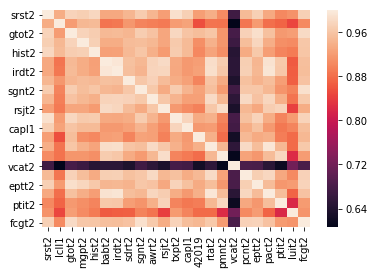

In [121]:
sns.heatmap(df.corr())
plt.show()

In [151]:
print norms
print np.flip(norms, axis = 0)

[0.62712294 0.65598659 0.67339481 0.67316027 0.62323517 0.72517656
 0.72429316 0.68321137 0.63231297 0.51867035 0.50416084]
[0.50416084 0.51867035 0.63231297 0.68321137 0.72429316 0.72517656
 0.62323517 0.67316027 0.67339481 0.65598659 0.62712294]


In [155]:
np.count_nonzero(A, axis = 1)

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23])

In [199]:
np.corrcoef(data).shape

(100, 100)

In [201]:
cols = ['a','b','c','d','e','f','g','h','i','j']

In [203]:
DF = pd.DataFrame( data=data,
                    columns = cols)

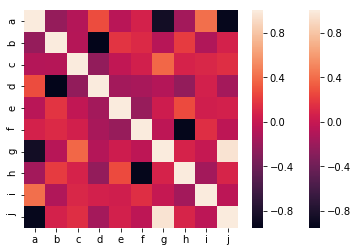

In [208]:
sns.heatmap(DF.corr())
plt.show()

In [259]:
Z.nonzero()[0]

array([8])

In [287]:
A.shape

(10, 10)

In [288]:
np.count_nonzero(A, axis = 0)

array([10,  0,  0, 10,  0, 10,  0,  0, 10, 10])

In [12]:
oc = Oct2Py()

u'.:/usr/local/lib/python2.7/dist-packages/oct2py:/usr/local/lib/python2.7/dist-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/4.2.2/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v51/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/site/m:/usr/share/octave/site/api-v51/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/4.2.2/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/m:/usr/share/octave/4.2.2/m/audio:/usr/share/octave/4.2.2/m/debian:/usr/share/octave/4.2.2/m/deprecated:/usr/share/octave/4.2.2/m/elfun:/usr/share/octave/4.2.2/m/general:/usr/share/octave/4.2.2/m/geometry:/usr/share/octave/4.2.2/m/gui:/usr/share/octave/4.2.2/m/help:/usr/share/octave/4.2.2/m/image:/usr/share/octave/4.2.2/m/io:/usr/share/octave/4.2.2/m/java:/usr/share/octave/4.2.2/m/linear-algebra:/usr/share/octave/4.2.2/m/miscellaneous:/usr/share/octave/4.2.2/m/ode:/usr/share/octave/4

In [38]:
y_oct = fogs.T
X_OCT = octave.OMP(np.eye(23), y_oct, 22)

In [34]:
np.linalg.norm(X_OCT.todense() - y_oct)

0.0

In [37]:
X_OCT.todense(),y_oct

(matrix([[0.13081395, 0.1627907 , 0.19186047, ..., 0.34302326, 0.30232558,
          0.29651163],
         [0.12346993, 0.1567323 , 0.17615753, ..., 0.32570516, 0.28738691,
          0.27765951],
         [0.        , 0.04789272, 0.09131545, ..., 0.34418902, 0.36015326,
          0.37484036],
         ...,
         [0.05236052, 0.06545859, 0.07839771, ..., 0.38226037, 0.38998569,
          0.39542203],
         [0.        , 0.04240401, 0.07612688, ..., 0.37629382, 0.38864775,
          0.4       ],
         [0.10576627, 0.14616096, 0.16682084, ..., 0.44187481, 0.45205057,
          0.46130126]]),
 array([[0.13081395, 0.1627907 , 0.19186047, ..., 0.34302326, 0.30232558,
         0.29651163],
        [0.12346993, 0.1567323 , 0.17615753, ..., 0.32570516, 0.28738691,
         0.27765951],
        [0.        , 0.04789272, 0.09131545, ..., 0.34418902, 0.36015326,
         0.37484036],
        ...,
        [0.05236052, 0.06545859, 0.07839771, ..., 0.38226037, 0.38998569,
         0.39542203],

In [144]:
print 'COMP= ',COMP,'WITH ',COMP

COMP=  11 WITH  11


In [145]:
norms = np.ndarray(0, dtype = float)

In [146]:
norms

array([], dtype=float64)

In [152]:
norms = np.append(norms,6)
norms

array([5., 5., 5., 5., 6.])